# TASK-3 Unsupervised Machine Learning -GRIP[The Sparks Foundation]

### Problem Statement:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import datasets

iris = datasets.load_iris()

## Import Dataset
Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [2]:
#Printing dataset
dataset =pd.read_csv("iris.csv")
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
dataset.shape

(150, 6)

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Checking the missing values

In [7]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Defining target and predictor

In [8]:
x = iris.data[:, :2]
y = iris.target

## Visualising data using scatter plot

Text(0, 0.5, 'Sepal Width')

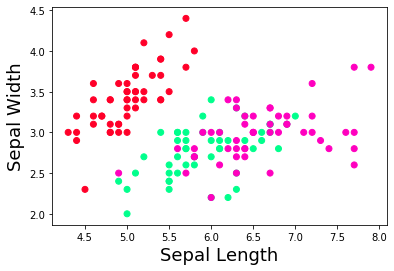

In [9]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


## Visualising data using boxplots

#### Boxplots of Sepal lengths by Different Species of Iris

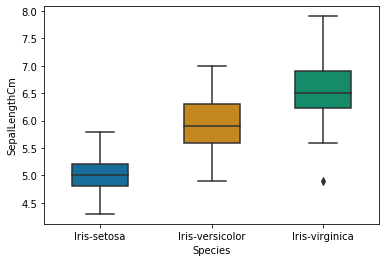

In [10]:

sns.boxplot(y='SepalLengthCm',x='Species', data=dataset, width=0.5, palette="colorblind")

#### Boxplots of Sepal widths by Different Species of Iris

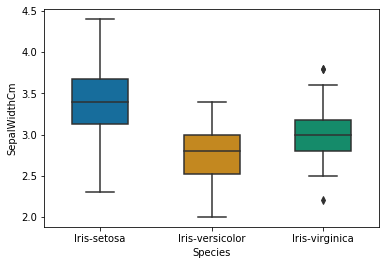

In [11]:

sns.boxplot(y='SepalWidthCm',x='Species', data=dataset, width=0.5, palette="colorblind")


#### Boxplots of Petal lengths by Different Species of Iris

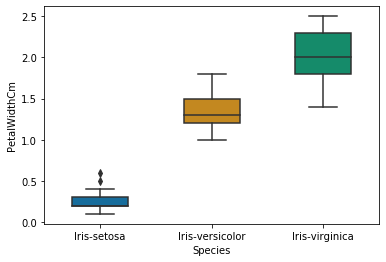

In [12]:
sns.boxplot(y='PetalWidthCm',x='Species', data=dataset, width=0.5, palette="colorblind")

### Generating Correlation Heatmap

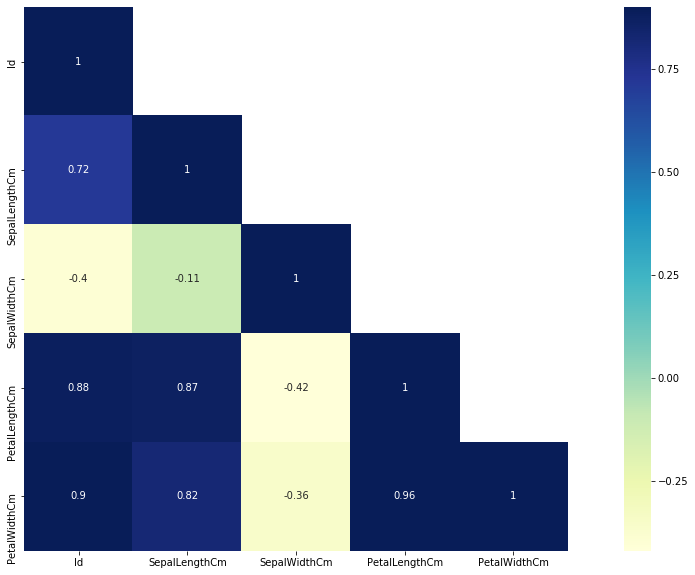

In [13]:
corr = dataset.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

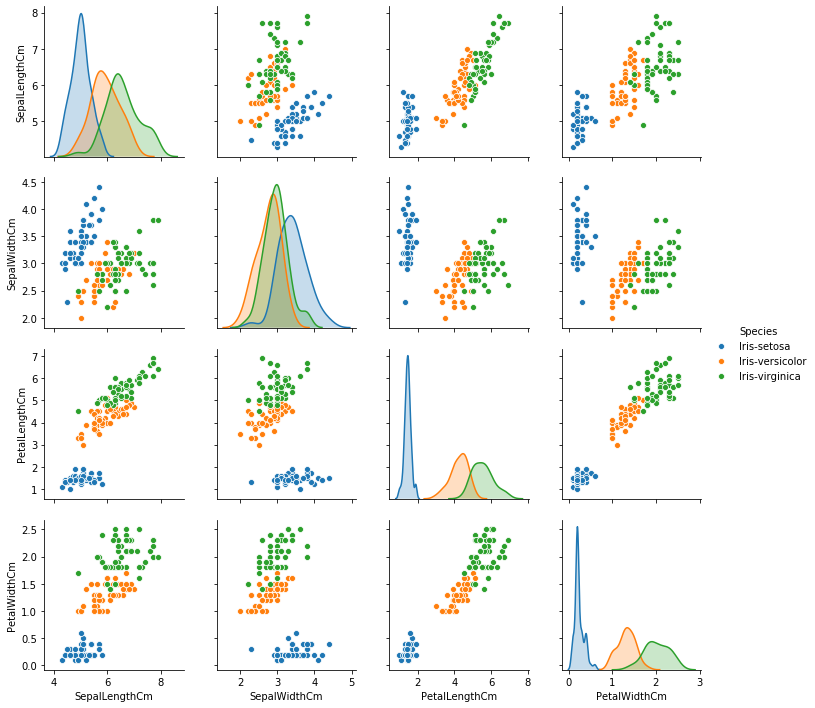

In [14]:
sns.pairplot(dataset.iloc[:,[1,2,3,4,5]],hue='Species')

### KMeans

In [15]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

### Identifying Centriods

In [16]:

centroids = km.cluster_centers_
print(centroids)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


### Elbow Method

Text(0.5, 1.0, 'Elbow Method Visualisation')

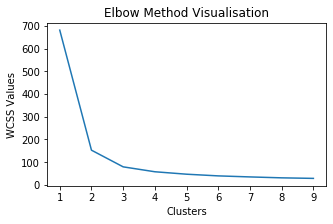

In [17]:
from sklearn.cluster import KMeans
wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(df)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(5,3))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

###  Applying kmeans to the dataset / Creating the kmeans classifier

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

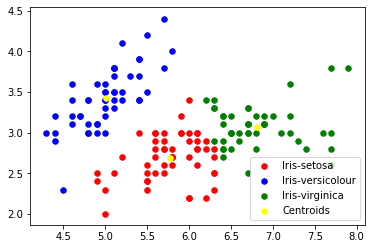

In [23]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'yellow', label = 'Centroids')
plt.legend()

# Result

1. After considering the values of K=2 or 3; we can conclude from above visualisations that 3 is the optimum value of K in this Iris dataset.
2. It can also be said that Petal features are better to recognise the clusters than the Sepal features.